# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

In [2]:
loans=pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis


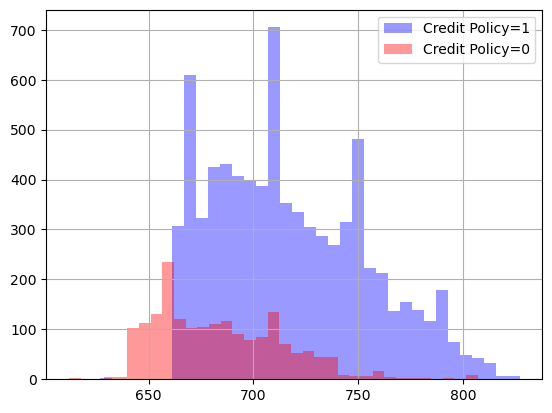

In [6]:
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',label='Credit Policy=1',alpha=0.4)
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red',label='Credit Policy=0',alpha=0.4)
plt.legend()
#fico is CREDIT CARD SCORE

Text(0.5, 0, 'FICO SCORE')

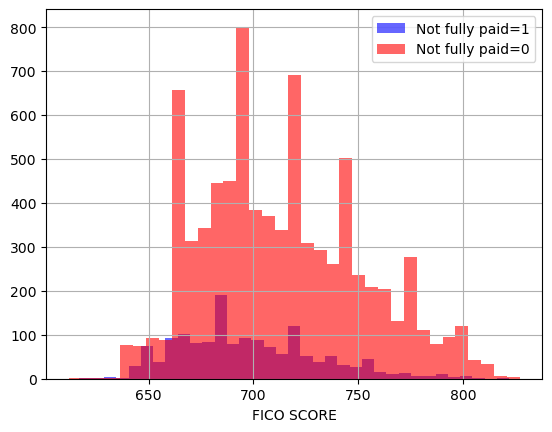

In [7]:
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='blue',label='Not fully paid=1',alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,color='red',label='Not fully paid=0',alpha=0.6)
plt.legend()
plt.xlabel('FICO SCORE')

<Axes: xlabel='purpose', ylabel='count'>

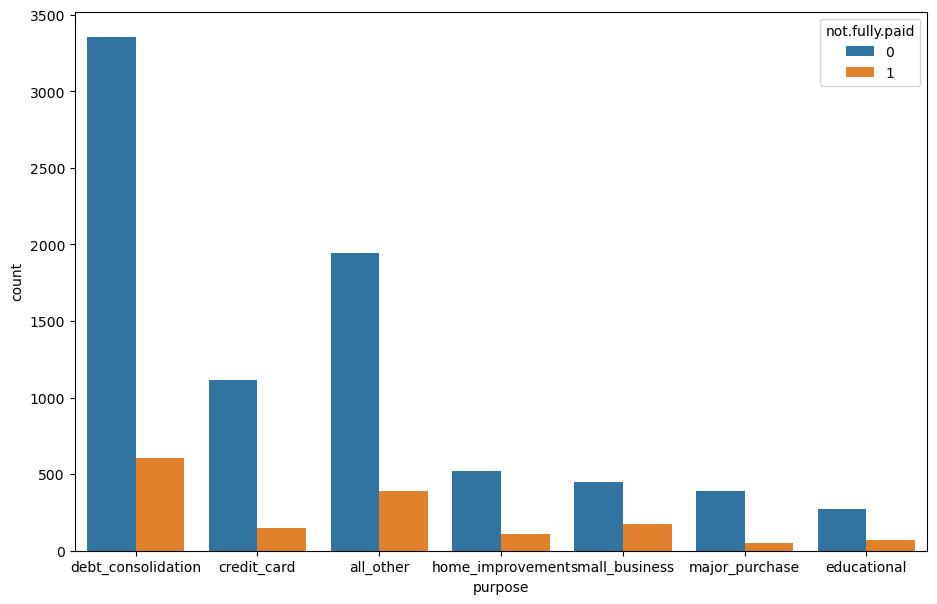

In [8]:
#plt is to make sure the size is large enough that the labels dont overlap
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans)

In [9]:
#categorical feature
cat_feats=['purpose']

In [10]:
#converting the categorical feature 'purpose' into dummy variables and creating the final data frame
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [11]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
#instantiating
dtree=DecisionTreeClassifier()

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [17]:
predictions=dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [20]:
print(confusion_matrix(y_test,predictions))

[[1999  432]
 [ 347   96]]


## Training the Random Forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc=RandomForestClassifier(n_estimators=300)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation of Random Forest

In [24]:
predictions=rfc.predict(X_test)

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.70      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.77      0.51      0.49      2874
weighted avg       0.83      0.85      0.79      2874



In [26]:
print(confusion_matrix(y_test,predictions))

[[2425    6]
 [ 429   14]]


# Support Vector Machine Classifier

In [27]:
from sklearn.svm import SVC

In [28]:
svc=SVC()

In [29]:
svc.fit(X_train,y_train)

SVC()

In [30]:
prediction=svc.predict(X_test)

In [31]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       1.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.92      0.50      0.46      2874
weighted avg       0.87      0.85      0.78      2874



# XGB Classifier

In [34]:
from xgboost import XGBClassifier

In [35]:
xgb=XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [37]:
predictions=xgb.predict(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

# Comparing the accuracies

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, dtree.predict(X_test)))
print(accuracy_score(y_test, rfc.predict(X_test)))
print(accuracy_score(y_test, svc.predict(X_test)))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(accuracy_score(y_test, lr.predict(X_test)))

0.7289491997216423
0.848643006263048
0.8462073764787752
0.8326374391092554
0.8475991649269311
